In [1]:
import sys, getopt

In [2]:
import codegen
import ast
import showast
import ctree
import random
import astpretty

# were installed

# pip3 install graphviz
# pip3 install codegen
# sudo apt-get install graphviz
# pip3 install ctree
# pip3 install showast
# pip3 install astpretty
# pip install uncompyle6
# sudo apt install pylint

# Деобфускатор

## Деобфускация байткода python

Самым распространённым методом обфускации кода на python является обфускация файла с расширением .py в файл с расширением .pyc при помощи команды:

python -m compileall

Этот модуль позволяет компилировать все файлы и библиотеки (т. е. все модули) в указанной директории в простой байт-код.

На практике это самый распространённый способ обфускации кода на python, но никаких особых алгоритмов обфускации использовано не было, только компиляция в нечитаемый байт-код.

В качестве примера взята программа для подсчета площади прямоугольного треугольника.
Исходного код находится в директории:

.\obfuscated\examples\compileall

Обфусцируем 
Результат обфускации будет находиться в директории:

.\obfuscated\examples\compileall\__pycache__

In [14]:
path_compileall = './obfuscated/examples/compileall/source.py'
f = open(path_compileall, 'r', encoding="utf-8")
print("\x1b[1;31m"+"Исходный код файла:\n"+"\x1b[0m")
print(f.read())
f.close()

Исходный код файла:

# программа для подсчета площади прямоугольного треугольника
def square_triangle_area(width, height):
    return height * width / 2


print("Эта программа считает площадь прямоугольного треугольника.")
print("Введите значение длины: ")

w = int(input())

print("Введите значение высоты: ")
h = int(input())

print("Площадь прямоугольного треугольника = " + str(square_triangle_area(w, h)))

input()



In [4]:
!python3 -m compileall ./obfuscated/examples/compileall

Listing './obfuscated/examples/compileall'...


In [15]:
path_compileall_pyc = "./obfuscated/examples/compileall/source.pyc"
print("\x1b[1;31m"+"Исходный код файла считанный просто при помощи функции open():\n"+"\x1b[0m")
file = open(path_compileall_pyc, 'rb')
print(file.read())
file.close()

Исходный код файла считанный просто при помощи функции open():

b'\x03\xf3\r\n\x96Q\x94`c\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00@\x00\x00\x00sY\x00\x00\x00d\x00\x00\x84\x00\x00Z\x00\x00d\x01\x00GHd\x02\x00GHe\x01\x00e\x02\x00\x83\x00\x00\x83\x01\x00Z\x03\x00d\x03\x00GHe\x01\x00e\x02\x00\x83\x00\x00\x83\x01\x00Z\x04\x00d\x04\x00e\x05\x00e\x00\x00e\x03\x00e\x04\x00\x83\x02\x00\x83\x01\x00\x17GHe\x02\x00\x83\x00\x00\x01d\x05\x00S(\x06\x00\x00\x00c\x02\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00C\x00\x00\x00s\x0c\x00\x00\x00|\x01\x00|\x00\x00\x14d\x01\x00\x15S(\x02\x00\x00\x00Ni\x02\x00\x00\x00(\x00\x00\x00\x00(\x02\x00\x00\x00t\x05\x00\x00\x00widtht\x06\x00\x00\x00height(\x00\x00\x00\x00(\x00\x00\x00\x00s*\x00\x00\x00./obfuscated/examples/compileall/source.pyt\x14\x00\x00\x00square_triangle_area\x02\x00\x00\x00s\x02\x00\x00\x00\x00\x01sn\x00\x00\x00\xd0\xad\xd1\x82\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb3\xd1\x80\xd0\xb0\xd0\xbc\xd0\xbc\xd0\xb0 \xd1\x81\xd1\x87\xd0\xb8\xd1\x82\xd

In [16]:
print("\x1b[1;31m"+"Исходный код файла побайтово в hex:\n"+"\x1b[0m")
path_compileall_pyc = "./obfuscated/examples/compileall/source.pyc"
file = open(path_compileall_pyc, 'rb')
blocksize = 1024
opts,args = getopt.getopt(sys.argv[1:],'f:b:')

for o,a in opts:
    if o == '-f':
        filename = a
    if o == '-b':
        blocksize = a

offset = 0
with file as f:
    block = f.read(blocksize)
    str = ""
    i = 0
    for ch in block:
        str += hex(ch)+" "
        i += 1
        if i == 16:
            str += "\n"
            i = 0
    print(str)

file.close()

Исходный код файла побайтово в hex:

0x3 0xf3 0xd 0xa 0x96 0x51 0x94 0x60 0x63 0x0 0x0 0x0 0x0 0x0 0x0 0x0 
0x0 0x5 0x0 0x0 0x0 0x40 0x0 0x0 0x0 0x73 0x59 0x0 0x0 0x0 0x64 0x0 
0x0 0x84 0x0 0x0 0x5a 0x0 0x0 0x64 0x1 0x0 0x47 0x48 0x64 0x2 0x0 0x47 
0x48 0x65 0x1 0x0 0x65 0x2 0x0 0x83 0x0 0x0 0x83 0x1 0x0 0x5a 0x3 0x0 
0x64 0x3 0x0 0x47 0x48 0x65 0x1 0x0 0x65 0x2 0x0 0x83 0x0 0x0 0x83 0x1 
0x0 0x5a 0x4 0x0 0x64 0x4 0x0 0x65 0x5 0x0 0x65 0x0 0x0 0x65 0x3 0x0 
0x65 0x4 0x0 0x83 0x2 0x0 0x83 0x1 0x0 0x17 0x47 0x48 0x65 0x2 0x0 0x83 
0x0 0x0 0x1 0x64 0x5 0x0 0x53 0x28 0x6 0x0 0x0 0x0 0x63 0x2 0x0 0x0 
0x0 0x2 0x0 0x0 0x0 0x2 0x0 0x0 0x0 0x43 0x0 0x0 0x0 0x73 0xc 0x0 
0x0 0x0 0x7c 0x1 0x0 0x7c 0x0 0x0 0x14 0x64 0x1 0x0 0x15 0x53 0x28 0x2 
0x0 0x0 0x0 0x4e 0x69 0x2 0x0 0x0 0x0 0x28 0x0 0x0 0x0 0x0 0x28 0x2 
0x0 0x0 0x0 0x74 0x5 0x0 0x0 0x0 0x77 0x69 0x64 0x74 0x68 0x74 0x6 0x0 
0x0 0x0 0x68 0x65 0x69 0x67 0x68 0x74 0x28 0x0 0x0 0x0 0x0 0x28 0x0 0x0 
0x0 0x0 0x73 0x2a 0x0 0x0 0x0 0x2e 0x2f 0x6

Как можно заметить, исходный код нечеловекочитаем.

Теперь его необходимо расшифровать.
Результат работы деобфускации будет доступен по пути:

./obfuscated/examples/compileall/deobfuscated

Для декомпиляции используется программа uncompyle6

In [7]:
!uncompyle6 ./obfuscated/examples/compileall/source.pyc

# uncompyle6 version 3.7.4
# Python bytecode 2.7 (62211)
# Decompiled from: Python 3.8.5 (default, Jan 27 2021, 15:41:15) 
# [GCC 9.3.0]
# Embedded file name: ./obfuscated/examples/compileall/source.py
# Compiled at: 2021-05-06 23:29:10


def square_triangle_area(width, height):
    return height * width / 2


print 'Эта программа считает площадь прямоугольного треугольника.'
print 'Введите значение длины: '
w = int(input())
print 'Введите значение высоты: '
h = int(input())
print 'Площадь прямоугольного треугольника = ' + str(square_triangle_area(w, h))
input()
# okay decompiling ./obfuscated/examples/compileall/source.pyc


Итог: программа, зашифрованная первым рассмотренным методом обфускации компиляцией, была успешно деобфусцирована.

## Абстрактное Синтаксическое Дерево

Используем паттерн "Visitor". Программный код представляется в виде ассоциативного массива.

!!! добавить картинку паттерна в диплом

Благодаря системному модулю ast нет необходимости подключать стороннюю реализацию.
Достаточно создать класс, наследуемый от
класса NodeTransformer и реализовать в нем
соответствующие методы.

Был подключен дополнительный модуль astpretty для вывода АСД. Пример работы модуля ниже.

In [18]:
path_ast = './obfuscated/examples/compileall/source.py'
f = open(path_ast, 'r', encoding="utf-8")
my_tree = ast.parse(f.read())
# print(ast.dump(my_tree))
astpretty.pprint(my_tree, show_offsets=False)
f.close()

Module(
    body=[
        FunctionDef(
            name='square_triangle_area',
            args=arguments(
                posonlyargs=[],
                args=[
                    arg(arg='width', annotation=None, type_comment=None),
                    arg(arg='height', annotation=None, type_comment=None),
                ],
                vararg=None,
                kwonlyargs=[],
                kw_defaults=[],
                kwarg=None,
                defaults=[],
            ),
            body=[
                Return(
                    value=BinOp(
                        left=BinOp(
                            left=Name(id='height', ctx=Load()),
                            op=Mult(),
                            right=Name(id='width', ctx=Load()),
                        ),
                        op=Div(),
                        right=Constant(value=2, kind=None),
                    ),
                ),
            ],
            decorator_list=[],
            retu

Для реализации обфускации необходимо написать функции паттерна "Visitor" для поещения и видоизменения разных типов узлов АСД. Начнём с изменения функции суммирования.

In [9]:
class ObfuscatorAST(ast.NodeTransformer):
#     def __init__(self):
#         ast.NodeTransformer.__init__(self)
    def visit_Num(self, node):
        value = node.n
        value_left = value_right = value / 2
        if value % 2:
            value_right += 1
        return BinOp(left=BinOp(Num(value_left)), op=Add(), right=Num(value_right))
    def visit_If(self, node):
        node.test = BoolOp(op=And(), values=[node.test, Compare(left=Num(1), ops=[Gt()], comparators=[Num(0)])])
        node.test = self.visit(node.test)
        return node
    def visit_Str(self, node):
        def rev(x):
            return Subscript(value=Str(s=x[::-1]),
        slice=Slice(lower=None, upper=None, step=Num(n=-1)), ctx=Load())
        return BinOp(left=rev(node.s[:len(node.s)/2]),
    op=Add(), right=rev(node.s[len(node.s)/2:]))

class LookNodes(ast.NodeVisitor):
    def generic_visit(self, node):
        print type(node).__name__
        ast.NodeVisitor.generic_visit(self, node)

look = LookNodes()
tree = ast.parse(str_code)
look.visit(tree)

SyntaxError: invalid syntax (<ipython-input-9-0847c6f5e425>, line 23)

In [ ]:
code = open(path, 'rb').read()
ast = ast.parse(code)
obf = Obfuscator()
ast2 = obf.visit(ast)
result = codegen.to_source(ast2)
# open(path, 'w').write(result)

In [ ]:
tree = ast.parse('foo', mode='eval')
new_tree = fix_missing_locations(RewriteName().visit(tree))

Смена условного ветвления на 

### Преобразование управления

Создание конечного автомата, но без непроницаемого предиката, а то слишком сложно.

## Лексическая обфускация

Далее следует вид обфускации, при котором изменяются названия методов и переменных так, что код становится нечеловекочитаемым, а также удаляются комментарии из кода. Удалённые комментарии восстановить конечно же невозможно, а переназвать переменные более менее осмысленно хотя бы основываясь на их типе или просто заменить сложную непонятную длинную последовательность символов на более удобную для чтения возможно.

In [ ]:
# тупа переименовывание, потом сделаю в самом конце

# Визуализация

Вспомогательная визуализация АСД для понимания программы человеком

попытки номер 1 отсюда
https://github.com/hchasestevens/show_ast/blob/master/Example.ipynb

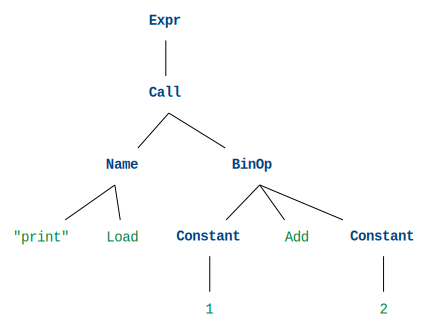

In [22]:
%%showast
print(1 + 2)

In [21]:
def example_function(a):
    for x in range(10):
        a[x] += x

tree1 = ast.parse(s)

show_source(example_function)

NameError: name 'show_source' is not defined

In [23]:
import inspect
expr="""
def foo():
   print("hello world")
"""
p=ast.parse(expr)

p.body[0].body = [ ast.parse("return 42").body[0] ] # Replace function body with "return 42"

print(codegen.to_source(p))

def foo():
    return 42


а дальше проблема несовместимости с версией 3.8, потому что в 3.9 появились starargs и codegen без них работать отказывается напрочь!!!

нормас, сделаю часть обфускатора тут красиво расписанную по отдельности, а потом соберу его по кусочкам в другом conda env под 3.9 python в цельный проект не в jupyter notebook, а в каком-нибудь pyCharm на какой-нибудь Windows

In [25]:
s = """
def example_function(a):
    for x in range(10):
        a[x] += x
"""

tree1 = ast.parse(s)

expr=s

p=ast.parse(expr)

# p.body[0].body = [ ast.parse("return 42").body[0] ] # Replace function body with "return 42"

print(codegen.to_source(p))
# show_source(p)

AttributeError: 'Call' object has no attribute 'starargs'

In [20]:
path_compileall = './obfuscated/examples/compileall/source.py'
f = open(path_compileall, 'r', encoding="utf-8")
my_tree = ast.parse(f.read(), mode="exec")
# show_source(f.read())
f.close()

попытки номер 2 отсюда

https://github.com/asottile/astpretty

https://stackoverflow.com/questions/58924031/generating-a-text-representation-of-pythons-ast

In [108]:
code = "one_plus_two = 1+2"
tree = ast.parse(code)
ast.dump(tree)

"Module(body=[Assign(targets=[Name(id='one_plus_two', ctx=Store())], value=BinOp(left=Num(n=1), op=Add(), right=Num(n=2)))])"

In [133]:
code = "one_plus_two = 1+2"
tree = ast.parse(code)
astpretty.pprint(tree, show_offsets=False)

Module(
    body=[
        Assign(
            targets=[Name(id='one_plus_two', ctx=Store())],
            value=BinOp(
                left=Num(n=1),
                op=Add(),
                right=Num(n=2),
            ),
        ),
    ],
)


ну что ж, сойдёт!

ctree вообще не работало, хз, почему, ничего не показывало и всё

Может быть ещё граф потока управления, но больше вроде бы ничего особо не требуется для человеческого восприятия

Ну мб разве что что-то из uml типа flow diagramm или Диаграмма последовательности, но тут хз